# Exploratory Data Analysis Notebook




In [4]:
import pandas as pd

In [5]:
import numpy as np

## Loading and Sampling the Data

In [6]:
accident_df = pd.read_csv('./Data-Collisions.csv' )

/home/pasberry/anaconda3/envs/coursera_pyspark/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [7]:
accident_df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [8]:
accident_df['ROADCOND'].value_counts()

Dry               124510
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64

## Checking the Consistancy of the Data

As we can see, a few of the columns have null or missing data

In [9]:
accident_df.isnull().any()

SEVERITYCODE      False
X                  True
Y                  True
OBJECTID          False
INCKEY            False
COLDETKEY         False
REPORTNO          False
STATUS            False
ADDRTYPE           True
INTKEY             True
LOCATION           True
EXCEPTRSNCODE      True
EXCEPTRSNDESC      True
SEVERITYCODE.1    False
SEVERITYDESC      False
COLLISIONTYPE      True
PERSONCOUNT       False
PEDCOUNT          False
PEDCYLCOUNT       False
VEHCOUNT          False
INCDATE           False
INCDTTM           False
JUNCTIONTYPE       True
SDOT_COLCODE      False
SDOT_COLDESC      False
INATTENTIONIND     True
UNDERINFL          True
WEATHER            True
ROADCOND           True
LIGHTCOND          True
PEDROWNOTGRNT      True
SDOTCOLNUM         True
SPEEDING           True
ST_COLCODE         True
ST_COLDESC         True
SEGLANEKEY        False
CROSSWALKKEY      False
HITPARKEDCAR      False
dtype: bool

In [10]:
accident_df.isnull().sum()


SEVERITYCODE           0
X                   5334
Y                   5334
OBJECTID               0
INCKEY                 0
COLDETKEY              0
REPORTNO               0
STATUS                 0
ADDRTYPE            1926
INTKEY            129603
LOCATION            2677
EXCEPTRSNCODE     109862
EXCEPTRSNDESC     189035
SEVERITYCODE.1         0
SEVERITYDESC           0
COLLISIONTYPE       4904
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDATE                0
INCDTTM                0
JUNCTIONTYPE        6329
SDOT_COLCODE           0
SDOT_COLDESC           0
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SDOTCOLNUM         79737
SPEEDING          185340
ST_COLCODE            18
ST_COLDESC          4904
SEGLANEKEY             0
CROSSWALKKEY           0
HITPARKEDCAR           0
dtype: int64

Below are the total number of records available for each data point

In [11]:
accident_df.count()

SEVERITYCODE      194673
X                 189339
Y                 189339
OBJECTID          194673
INCKEY            194673
COLDETKEY         194673
REPORTNO          194673
STATUS            194673
ADDRTYPE          192747
INTKEY             65070
LOCATION          191996
EXCEPTRSNCODE      84811
EXCEPTRSNDESC       5638
SEVERITYCODE.1    194673
SEVERITYDESC      194673
COLLISIONTYPE     189769
PERSONCOUNT       194673
PEDCOUNT          194673
PEDCYLCOUNT       194673
VEHCOUNT          194673
INCDATE           194673
INCDTTM           194673
JUNCTIONTYPE      188344
SDOT_COLCODE      194673
SDOT_COLDESC      194673
INATTENTIONIND     29805
UNDERINFL         189789
WEATHER           189592
ROADCOND          189661
LIGHTCOND         189503
PEDROWNOTGRNT       4667
SDOTCOLNUM        114936
SPEEDING            9333
ST_COLCODE        194655
ST_COLDESC        189769
SEGLANEKEY        194673
CROSSWALKKEY      194673
HITPARKEDCAR      194673
dtype: int64

In [12]:
len(accident_df.index)

194673

Simple correlation performed on the dataframe

In [13]:
accident_df.corr()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
SEVERITYCODE,1.000000,0.010309,0.017737,0.020131,0.022065,0.022079,0.006553,1.000000,0.130949,0.246338,0.214218,-0.054686,0.188905,0.004226,0.104276,0.175093
X,0.010309,1.000000,-0.160262,0.009956,0.010309,0.010300,0.120754,0.010309,0.012887,0.011304,-0.001752,-0.012168,0.010904,-0.001016,-0.001618,0.013586
Y,0.017737,-0.160262,1.000000,-0.023848,-0.027396,-0.027415,-0.114935,0.017737,-0.013850,0.010178,0.026304,0.017058,-0.019694,-0.006958,0.004618,0.009508
OBJECTID,0.020131,0.009956,-0.023848,1.000000,0.946383,0.945837,0.046929,0.020131,-0.062333,0.024604,0.034432,-0.094280,-0.037094,0.969276,0.028076,0.056046
INCKEY,0.022065,0.010309,-0.027396,0.946383,1.000000,0.999996,0.048524,0.022065,-0.061500,0.024918,0.031342,-0.107528,-0.027617,0.990571,0.019701,0.048179
COLDETKEY,0.022079,0.010300,-0.027415,0.945837,0.999996,1.000000,0.048499,0.022079,-0.061403,0.024914,0.031296,-0.107598,-0.027461,0.990571,0.019586,0.048063
INTKEY,0.006553,0.120754,-0.114935,0.046929,0.048524,0.048499,1.000000,0.006553,0.001886,-0.004784,0.000531,-0.012929,0.007114,0.032604,-0.010510,0.018420
SEVERITYCODE.1,1.000000,0.010309,0.017737,0.020131,0.022065,0.022079,0.006553,1.000000,0.130949,0.246338,0.214218,-0.054686,0.188905,0.004226,0.104276,0.175093
PERSONCOUNT,0.130949,0.012887,-0.013850,-0.062333,-0.061500,-0.061403,0.001886,0.130949,1.000000,-0.023464,-0.038809,0.380523,-0.128960,0.011784,-0.021383,-0.032258
PEDCOUNT,0.246338,0.011304,0.010178,0.024604,0.024918,0.024914,-0.004784,0.246338,-0.023464,1.000000,-0.016920,-0.261285,0.260393,0.021461,0.001810,0.565326


## Sample the Data From Potential Features

As we can see below, the Severity of the accident is broken into two classes, with 130000+ positve and 50000+ negatives



In [14]:
accident_df['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

<br>
<br>


**In addition to sampling the 'Severity' column, below other samplings can be observed**


<br>

In [15]:
accident_df['LIGHTCOND'].value_counts()

Daylight                    116137
Dark - Street Lights On      48507
Unknown                      13473
Dusk                          5902
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off      1199
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

In [16]:
accident_df['COLLISIONTYPE'].value_counts()

Parked Car    47987
Angles        34674
Rear Ended    34090
Other         23703
Sideswipe     18609
Left Turn     13703
Pedestrian     6608
Cycles         5415
Right Turn     2956
Head On        2024
Name: COLLISIONTYPE, dtype: int64

In [17]:
accident_df['INCDATE'].value_counts()

2006/11/02 00:00:00+00    96
2008/10/03 00:00:00+00    92
2005/05/18 00:00:00+00    84
2006/01/13 00:00:00+00    83
2005/11/05 00:00:00+00    83
                          ..
2020/05/18 00:00:00+00     2
2020/05/20 00:00:00+00     1
2020/05/19 00:00:00+00     1
2015/12/25 00:00:00+00     1
2020/05/17 00:00:00+00     1
Name: INCDATE, Length: 5985, dtype: int64

In [18]:
accident_df['INCDTTM'].value_counts()

11/2/2006                96
10/3/2008                91
11/5/2005                83
12/4/2004                74
6/1/2006                 73
                         ..
6/29/2014 11:00:00 PM     1
6/3/2016 4:27:00 PM       1
8/3/2012 9:37:00 PM       1
8/8/2012                  1
4/6/2017 8:29:00 PM       1
Name: INCDTTM, Length: 162058, dtype: int64

In [19]:
accident_df['JUNCTIONTYPE'].value_counts()

Mid-Block (not related to intersection)              89800
At Intersection (intersection related)               62810
Mid-Block (but intersection related)                 22790
Driveway Junction                                    10671
At Intersection (but not related to intersection)     2098
Ramp Junction                                          166
Unknown                                                  9
Name: JUNCTIONTYPE, dtype: int64

In [20]:
accident_df['SDOT_COLCODE'].value_counts()

11    85209
14    54299
16     9928
0      9787
28     8856
24     6518
13     5852
26     4741
18     3104
15     1604
12     1440
51     1312
29      479
21      181
56      180
27      166
54      139
23      124
48      107
31      104
25      102
34       93
64       75
69       69
33       53
55       50
66       23
22       17
32       12
53        9
44        8
61        7
35        6
58        5
68        4
36        4
46        3
52        2
47        1
Name: SDOT_COLCODE, dtype: int64

In [21]:
accident_df['SDOT_COLDESC'].value_counts()

MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END AT ANGLE          85209
MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END                    54299
MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE SIDESWIPE          9928
NOT ENOUGH INFORMATION / NOT APPLICABLE                          9787
MOTOR VEHICLE RAN OFF ROAD - HIT FIXED OBJECT                    8856
MOTOR VEHCILE STRUCK PEDESTRIAN                                  6518
MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE AT ANGLE           5852
MOTOR VEHICLE STRUCK OBJECT IN ROAD                              4741
MOTOR VEHICLE STRUCK PEDALCYCLIST, FRONT END AT ANGLE            3104
MOTOR VEHICLE STRUCK MOTOR VEHICLE, RIGHT SIDE SIDESWIPE         1604
MOTOR VEHICLE STRUCK MOTOR VEHICLE, RIGHT SIDE AT ANGLE          1440
PEDALCYCLIST STRUCK MOTOR VEHICLE FRONT END AT ANGLE             1312
MOTOR VEHICLE OVERTURNED IN ROAD                                  479
MOTOR VEHICLE STRUCK PEDALCYCLIST, REAR END                       181
PEDALCYCLIST STRUCK 

In [22]:
accident_df['INATTENTIONIND'].value_counts()

Y    29805
Name: INATTENTIONIND, dtype: int64

In [23]:
accident_df['UNDERINFL'].value_counts()

N    100274
0     80394
Y      5126
1      3995
Name: UNDERINFL, dtype: int64

In [24]:
accident_df['WEATHER'].value_counts()

Clear                       111135
Raining                      33145
Overcast                     27714
Unknown                      15091
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [25]:
accident_df['ROADCOND'].value_counts()

Dry               124510
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64

In [26]:
accident_df['PEDCYLCOUNT'].value_counts()

0    189189
1      5441
2        43
Name: PEDCYLCOUNT, dtype: int64

In [27]:
accident_df['PEDCOUNT'].value_counts()

0    187734
1      6685
2       226
3        22
4         4
6         1
5         1
Name: PEDCOUNT, dtype: int64

In [28]:
accident_df['PEDROWNOTGRNT'].value_counts()

Y    4667
Name: PEDROWNOTGRNT, dtype: int64

In [29]:
accident_df['SDOTCOLNUM'].value_counts()

4116034.0     2
11200007.0    2
4112025.0     2
4116048.0     2
5036003.0     1
             ..
6262043.0     1
6162018.0     1
6277003.0     1
8267022.0     1
5071015.0     1
Name: SDOTCOLNUM, Length: 114932, dtype: int64

In [30]:
accident_df['SPEEDING'].value_counts()

Y    9333
Name: SPEEDING, dtype: int64

In [31]:
accident_df['ST_COLCODE'].value_counts()

32    27612
10    23427
14    16883
32    16809
10    11247
      ...  
49        1
54        1
43        1
87        1
60        1
Name: ST_COLCODE, Length: 115, dtype: int64

In [32]:
accident_df['ST_COLDESC'].value_counts()

One parked--one moving                                                 44421
Entering at angle                                                      34674
From same direction - both going straight - one stopped - rear-end     25771
Fixed object                                                           13554
From same direction - both going straight - both moving - sideswipe    12777
                                                                       ...  
Railway Vehicle Strikes Pedalcyclist                                       2
Vehicle Strikes All Other Non-Domestic Animal                              2
Vehicle Strikes Deer                                                       1
Non-domestic animal (deer, bear, elk, etc)                                 1
Vehicle Hits State Road or Construction Machinery                          1
Name: ST_COLDESC, Length: 62, dtype: int64

In [33]:
accident_df['ADDRTYPE'].value_counts()

Block           126926
Intersection     65070
Alley              751
Name: ADDRTYPE, dtype: int64

In [34]:
len(accident_df['ADDRTYPE'])

194673

In [35]:
accident_df['JUNCTIONTYPE'].value_counts()

Mid-Block (not related to intersection)              89800
At Intersection (intersection related)               62810
Mid-Block (but intersection related)                 22790
Driveway Junction                                    10671
At Intersection (but not related to intersection)     2098
Ramp Junction                                          166
Unknown                                                  9
Name: JUNCTIONTYPE, dtype: int64

In [36]:
accident_df['EXCEPTRSNDESC'].value_counts()

Not Enough Information, or Insufficient Location Information    5638
Name: EXCEPTRSNDESC, dtype: int64

In [37]:
accident_df.describe()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,65070.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,1.149360e+05,194673.000000,1.946730e+05
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,37558.450576,1.298901,2.444427,0.037139,0.028391,1.920780,13.867768,7.972521e+06,269.401114,9.782452e+03
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,51745.990273,0.457778,1.345929,0.198150,0.167413,0.631047,6.868755,2.553533e+06,3315.776055,7.226926e+04
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,23807.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000e+00
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,28667.000000,1.000000,2.000000,0.000000,0.000000,2.000000,11.000000,6.040015e+06,0.000000,0.000000e+00
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,29973.000000,1.000000,2.000000,0.000000,0.000000,2.000000,13.000000,8.023022e+06,0.000000,0.000000e+00
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,33973.000000,2.000000,3.000000,0.000000,0.000000,2.000000,14.000000,1.015501e+07,0.000000,0.000000e+00
max,2.000000,-122.238949,47.734142,219547.000000,331454.000000,332954.000000,757580.000000,2.000000,81.000000,6.000000,2.000000,12.000000,69.000000,1.307202e+07,525241.000000,5.239700e+06


In [38]:
accident_df['X'].value_counts()

-122.332653    265
-122.344896    254
-122.328079    252
-122.344997    239
-122.299160    231
              ... 
-122.322768      1
-122.288680      1
-122.405699      1
-122.323578      1
-122.343898      1
Name: X, Length: 23563, dtype: int64

In [39]:
accident_df['Y'].value_counts()

47.708655    265
47.717173    254
47.604161    252
47.725036    239
47.579673    231
            ... 
47.556705      1
47.709101      1
47.513899      1
47.565438      1
47.563521      1
Name: Y, Length: 23839, dtype: int64

In [40]:
incident_df = accident_df[['INCDATE']]
incident_df

,INCDATE
0,2013/03/27 00:00:00+00
1,2006/12/20 00:00:00+00
2,2004/11/18 00:00:00+00
3,2013/03/29 00:00:00+00
4,2004/01/28 00:00:00+00
...,...
194668,2018/11/12 00:00:00+00
194669,2018/12/18 00:00:00+00
194670,2019/01/19 00:00:00+00
194671,2019/01/15 00:00:00+00


In [38]:
incident_df['INCDATE'][0].split()[0].replace('/', '-')

'2013-03-27'

In [39]:
x = incident_df['INCDATE'].apply(lambda row : row.split()[0].replace('/', '-'))
x

0         2013-03-27
1         2006-12-20
2         2004-11-18
3         2013-03-29
4         2004-01-28
             ...    
194668    2018-11-12
194669    2018-12-18
194670    2019-01-19
194671    2019-01-15
194672    2018-11-30
Name: INCDATE, Length: 194673, dtype: object

## Transforming the Data to Build the Feature Set

In [41]:
from datetime import date

In [42]:
def get_accident_month(row):
    '''
        This function will take the month from the INCDATE column of the dataset.
    '''
    date_iso_format = row.split()[0].replace('/', '-')
    date_val = date.fromisoformat(date_iso_format)
    
    if date_val.month == 1:
        return 'January'
    elif date_val.month == 2:
        return 'Feburary'
    elif date_val.month == 3:
        return 'March'
    elif date_val.month == 4:
        return 'April'
    elif date_val.month == 5:
        return 'May'
    elif date_val.month == 6:
        return 'June'
    elif date_val.month == 7:
        return 'July'
    elif date_val.month == 8:
        return 'August'
    elif date_val.month == 9:
        return 'September'
    elif date_val.month == 10:
        return 'October'
    elif date_val.month == 11:
        return 'November'
    elif date_val.month == 12:
        return 'December'
    
    return date_val.month

In [43]:
months = incident_df['INCDATE'].apply(lambda row : get_accident_month(row))
months

0            March
1         December
2         November
3            March
4          January
            ...   
194668    November
194669    December
194670     January
194671     January
194672    November
Name: INCDATE, Length: 194673, dtype: object

In [43]:
s = date.fromisoformat(incident_df['INCDATE'][0].split()[0].replace('/', '-'))

In [44]:
s

datetime.date(2013, 3, 27)

In [45]:
s.month

3

In [44]:
def get_accident_day_of_week(row):
    '''
        This function will take the day of the week from the INCDATE column of the dataset.
    '''
    date_iso_format = row.split()[0].replace('/', '-')
    date_val = date.fromisoformat(date_iso_format)
    
    if date_val.weekday() == 0:
        return 'Monday'
    elif date_val.weekday() == 1:
        return 'Tuesday'
    elif date_val.weekday() == 2:
        return 'Wednesday'
    elif date_val.weekday() == 3:
        return 'Thursday'
    elif date_val.weekday() == 4:
        return 'Friday'
    elif date_val.weekday() == 5:
        return 'Saturday'
    elif date_val.weekday() == 6:
        return 'Sunday'
    
    return date_val.weekday()

In [45]:
days_of_week = incident_df['INCDATE'].apply(lambda row : get_accident_day_of_week(row))

In [46]:
days_of_week

0         Wednesday
1         Wednesday
2          Thursday
3            Friday
4         Wednesday
            ...    
194668       Monday
194669      Tuesday
194670     Saturday
194671      Tuesday
194672       Friday
Name: INCDATE, Length: 194673, dtype: object

In [49]:
 accident_df['ROADCOND'][0] 

'Wet'

In [47]:
def change_road_condition_categories(row):
    
    '''
        This function will recategorize the road conditions into two categories, Fair and Hazardous
    '''
        
    HAZARD_CONDITION = 'Hazardous'
    FAIR_CONDITION = 'Fair'
    
    if row == 'Dry':
        return FAIR_CONDITION
    elif row == 'Wet' or row == 'Snow/Slush' or row == 'Ice' or row == 'Standing Water'or row == 'Sand/Mud/Dirt' or row == 'Oil':
        return HAZARD_CONDITION
    else :
        return FAIR_CONDITION

In [48]:
road_condition = accident_df['ROADCOND'].apply(lambda row : change_road_condition_categories(row))

In [52]:
road_condition

0         Hazardous
1         Hazardous
2              Fair
3              Fair
4         Hazardous
            ...    
194668         Fair
194669    Hazardous
194670         Fair
194671         Fair
194672    Hazardous
Name: ROADCOND, Length: 194673, dtype: object

In [49]:
def change_weather_condition_categories(row):
    '''
        This function will recategorize the weather conditions into two categories, Clear and Inclement
    '''
    
    CLEAR_CONDITION = 'Clear'
    INCLEMENT_CONDITION = 'Inclement'
    
    if row == 'Clear' or row == 'Overcast' or row == 'Unknown' or row == 'Other' or row == 'Partly Cloudy' :
        return CLEAR_CONDITION
    elif row == 'Raining' or row == 'Snowing' or row == 'Fog/Smog/Smoke' or row == 'Sleet/Hail/Freezing Rain' or row == 'Blowing Sand/Dirt' or row == 'Severe Crosswind' :
        return INCLEMENT_CONDITION
    else:
        return CLEAR_CONDITION
    
    

In [50]:
weather_condition = accident_df['WEATHER'].apply(lambda row : change_weather_condition_categories(row))
weather_condition

0             Clear
1         Inclement
2             Clear
3             Clear
4         Inclement
            ...    
194668        Clear
194669    Inclement
194670        Clear
194671        Clear
194672        Clear
Name: WEATHER, Length: 194673, dtype: object

In [51]:
weather_condition[weather_condition != 'Clear'].shape

(34815,)

In [52]:
def change_lighting_condition_categories(row):
    '''
        This function will recategorize the lighting condition into two categories. Night and Day
    '''
    
    DAY_HOURS = 'Day'
    NIGHT_HOURS = 'Night'
    
    if row == 'Daylight' or row == 'Unknown' or row == 'Dusk' or row == 'Dawn' or row == 'Other' :
        return DAY_HOURS
    elif row == 'Dark - Street Lights On' or row == 'Dark - No Street Lights' or row == 'Dark - Street Lights Off' or row == 'Dark - Unknown Lighting' :
        return NIGHT_HOURS
    else:
        return DAY_HOURS




In [53]:
lighting_condition = accident_df['LIGHTCOND'].apply(lambda row : change_lighting_condition_categories(row))
lighting_condition

0           Day
1         Night
2           Day
3           Day
4           Day
          ...  
194668      Day
194669      Day
194670      Day
194671      Day
194672      Day
Name: LIGHTCOND, Length: 194673, dtype: object

In [54]:
lighting_condition[lighting_condition == 'Day'].to_numpy().shape

(143419,)

In [55]:
def change_under_the_influence_categories(row):
    ''' 
        This function will combine categories 0 and N into a No category and Y and 1 into a Yes category
    '''
    
    NO = "No"
    YES = "Yes"
    
    if row == 'N' or row == '0' :
        return NO
    elif row == 'Y' or row == '1' :
        return YES
    else:
        return NO

In [56]:
under_the_influence = accident_df['UNDERINFL'].apply(lambda row : change_under_the_influence_categories(row))

In [57]:
under_the_influence[under_the_influence == 'No'].to_numpy().shape

(185552,)

In [62]:
accident_df['VEHCOUNT'].max()

12

In [63]:
accident_df['VEHCOUNT'].min()


0

In [64]:
accident_df['VEHCOUNT'].mean()

1.9207799746241132

In [58]:
vehicle_count = (accident_df['VEHCOUNT'] - accident_df['VEHCOUNT'].min() ) / (accident_df['VEHCOUNT'].max() - accident_df['VEHCOUNT'].min())

In [59]:
vehicle_count.fillna(vehicle_count.mode())

0         0.166667
1         0.166667
2         0.250000
3         0.250000
4         0.166667
            ...   
194668    0.166667
194669    0.166667
194670    0.166667
194671    0.083333
194672    0.166667
Name: VEHCOUNT, Length: 194673, dtype: float64

In [60]:
person_count = (accident_df['PERSONCOUNT'] - accident_df['PERSONCOUNT'].min() ) / (accident_df['PERSONCOUNT'].max() - accident_df['PERSONCOUNT'].min())

In [61]:
person_count.fillna(person_count.mode())

0         0.024691
1         0.024691
2         0.049383
3         0.037037
4         0.024691
            ...   
194668    0.037037
194669    0.024691
194670    0.037037
194671    0.024691
194672    0.024691
Name: PERSONCOUNT, Length: 194673, dtype: float64

In [62]:
pedestrian_count = (accident_df['PEDCOUNT'] - accident_df['PEDCOUNT'].min() ) / (accident_df['PEDCOUNT'].max() - accident_df['PEDCOUNT'].min())

In [63]:
pedestrian_count.fillna(pedestrian_count.mode())

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
194668    0.0
194669    0.0
194670    0.0
194671    0.0
194672    0.0
Name: PEDCOUNT, Length: 194673, dtype: float64

In [64]:
cyclist_count = (accident_df['PEDCYLCOUNT'] - accident_df['PEDCYLCOUNT'].min() ) / (accident_df['PEDCYLCOUNT'].max() - accident_df['PEDCYLCOUNT'].min())

In [65]:
cyclist_count.fillna(cyclist_count.mode())

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
194668    0.0
194669    0.0
194670    0.0
194671    0.5
194672    0.0
Name: PEDCYLCOUNT, Length: 194673, dtype: float64

In [66]:
accident_location = accident_df['ADDRTYPE'].fillna('Block')

In [67]:
X_scaled = (accident_df['X'] - accident_df['X'].min()) / (accident_df['X'].max() -  accident_df['X'].min() )

In [68]:
X_scaled

0         0.532596
1         0.398557
2         0.469359
3         0.467897
4         0.625423
            ...   
194668    0.712022
194669    0.413924
194670    0.623967
194671    0.354024
194672    0.720163
Name: X, Length: 194673, dtype: float64

In [69]:
X_scaled.fillna(X_scaled.mode())

0         0.532596
1         0.398557
2         0.469359
3         0.467897
4         0.625423
            ...   
194668    0.712022
194669    0.413924
194670    0.623967
194671    0.354024
194672    0.720163
Name: X, Length: 194673, dtype: float64

In [70]:
Y_scaled = (accident_df['Y'] - accident_df['Y'].min()) / (accident_df['Y'].max() -  accident_df['Y'].min() )

In [71]:
Y_scaled

0         0.870053
1         0.635455
2         0.470718
3         0.457855
4         0.210281
            ...   
194668    0.292726
194669    0.818844
194670    0.785828
194671    0.767751
194672    0.483903
Name: Y, Length: 194673, dtype: float64

In [72]:
Y_scaled.fillna(Y_scaled.mode())

0         0.870053
1         0.635455
2         0.470718
3         0.457855
4         0.210281
            ...   
194668    0.292726
194669    0.818844
194670    0.785828
194671    0.767751
194672    0.483903
Name: Y, Length: 194673, dtype: float64

<br>


## Building Features Dictionary

In [73]:
unscaled_features = {'X' : accident_df['X'], 'Y' : accident_df['Y'], 'Incident Month' : months, 'Incident Day of Week' : days_of_week, 'Road Condition' : road_condition, 'Weather' : weather_condition, 'Time of Day' : lighting_condition, 'Drunk Driving Incident': under_the_influence, 'Vehicles Involved': accident_df['VEHCOUNT'] , 'Persons Involved': accident_df['PERSONCOUNT'] ,"Bicycle Involved": accident_df['PEDCYLCOUNT'], "Pedestrians Involved" :accident_df['PEDCOUNT'],  "Accident Location": accident_location}

In [74]:
features = {'X' : X_scaled, 'Y' : Y_scaled, 'Incident Month' : months, 'Incident Day of Week' : days_of_week, 'Road Condition' : road_condition, 'Weather' : weather_condition, 'Time of Day' : lighting_condition, 'Drunk Driving Incident': under_the_influence, 'Vehicles Involved': vehicle_count , 'Persons Involved': person_count , "Bicycle Involved" : cyclist_count ,"Pedestrians Involved" : pedestrian_count,  "Accident Location": accident_location}

<br>
<br>

## Building the Feature Set Dataframe

Here is the dataframe containing the selected features used in our classification algorithms

In [75]:
unscaled_features_df = pd.DataFrame(unscaled_features)

In [76]:
unscaled_features_df

,X,Y,Incident Month,Incident Day of Week,Road Condition,Weather,Time of Day,Drunk Driving Incident,Vehicles Involved,Persons Involved,Bicycle Involved,Pedestrians Involved,Accident Location
0,-122.323148,47.703140,March,Wednesday,Hazardous,Clear,Day,No,2,2,0,0,Intersection
1,-122.347294,47.647172,December,Wednesday,Hazardous,Inclement,Night,No,2,2,0,0,Block
2,-122.334540,47.607871,November,Thursday,Fair,Clear,Day,No,3,4,0,0,Block
3,-122.334803,47.604803,March,Friday,Fair,Clear,Day,No,3,3,0,0,Block
4,-122.306426,47.545739,January,Wednesday,Hazardous,Inclement,Day,No,2,2,0,0,Intersection
...,...,...,...,...,...,...,...,...,...,...,...,...,...
194668,-122.290826,47.565408,November,Monday,Fair,Clear,Day,No,2,3,0,0,Block
194669,-122.344526,47.690924,December,Tuesday,Hazardous,Inclement,Day,No,2,2,0,0,Block
194670,-122.306689,47.683047,January,Saturday,Fair,Clear,Day,No,2,3,0,0,Intersection
194671,-122.355317,47.678734,January,Tuesday,Fair,Clear,Day,No,1,2,1,0,Intersection


The below dataframe represents the data with all numerical data **Min/Max Normalized**

In [77]:
features_df = pd.DataFrame(features)

In [78]:
features_df

,X,Y,Incident Month,Incident Day of Week,Road Condition,Weather,Time of Day,Drunk Driving Incident,Vehicles Involved,Persons Involved,Bicycle Involved,Pedestrians Involved,Accident Location
0,0.532596,0.870053,March,Wednesday,Hazardous,Clear,Day,No,0.166667,0.024691,0.0,0.0,Intersection
1,0.398557,0.635455,December,Wednesday,Hazardous,Inclement,Night,No,0.166667,0.024691,0.0,0.0,Block
2,0.469359,0.470718,November,Thursday,Fair,Clear,Day,No,0.250000,0.049383,0.0,0.0,Block
3,0.467897,0.457855,March,Friday,Fair,Clear,Day,No,0.250000,0.037037,0.0,0.0,Block
4,0.625423,0.210281,January,Wednesday,Hazardous,Inclement,Day,No,0.166667,0.024691,0.0,0.0,Intersection
...,...,...,...,...,...,...,...,...,...,...,...,...,...
194668,0.712022,0.292726,November,Monday,Fair,Clear,Day,No,0.166667,0.037037,0.0,0.0,Block
194669,0.413924,0.818844,December,Tuesday,Hazardous,Inclement,Day,No,0.166667,0.024691,0.0,0.0,Block
194670,0.623967,0.785828,January,Saturday,Fair,Clear,Day,No,0.166667,0.037037,0.0,0.0,Intersection
194671,0.354024,0.767751,January,Tuesday,Fair,Clear,Day,No,0.083333,0.024691,0.5,0.0,Intersection


<br>

Now we will **One Hot Encode** all of the categorical fields of the `features_df`

In [79]:
features_vectorized_df = pd.concat ([features_df , pd.get_dummies(features_df['Road Condition'], prefix='road_condition')] , axis = 1)

In [80]:
features_vectorized_df

,X,Y,Incident Month,Incident Day of Week,Road Condition,Weather,Time of Day,Drunk Driving Incident,Vehicles Involved,Persons Involved,Bicycle Involved,Pedestrians Involved,Accident Location,road_condition_Fair,road_condition_Hazardous
0,0.532596,0.870053,March,Wednesday,Hazardous,Clear,Day,No,0.166667,0.024691,0.0,0.0,Intersection,0,1
1,0.398557,0.635455,December,Wednesday,Hazardous,Inclement,Night,No,0.166667,0.024691,0.0,0.0,Block,0,1
2,0.469359,0.470718,November,Thursday,Fair,Clear,Day,No,0.250000,0.049383,0.0,0.0,Block,1,0
3,0.467897,0.457855,March,Friday,Fair,Clear,Day,No,0.250000,0.037037,0.0,0.0,Block,1,0
4,0.625423,0.210281,January,Wednesday,Hazardous,Inclement,Day,No,0.166667,0.024691,0.0,0.0,Intersection,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194668,0.712022,0.292726,November,Monday,Fair,Clear,Day,No,0.166667,0.037037,0.0,0.0,Block,1,0
194669,0.413924,0.818844,December,Tuesday,Hazardous,Inclement,Day,No,0.166667,0.024691,0.0,0.0,Block,0,1
194670,0.623967,0.785828,January,Saturday,Fair,Clear,Day,No,0.166667,0.037037,0.0,0.0,Intersection,1,0
194671,0.354024,0.767751,January,Tuesday,Fair,Clear,Day,No,0.083333,0.024691,0.5,0.0,Intersection,1,0


In [81]:
features_vectorized_df = features_vectorized_df.drop(['Road Condition'], axis=1)

In [82]:
features_vectorized_df

,X,Y,Incident Month,Incident Day of Week,Weather,Time of Day,Drunk Driving Incident,Vehicles Involved,Persons Involved,Bicycle Involved,Pedestrians Involved,Accident Location,road_condition_Fair,road_condition_Hazardous
0,0.532596,0.870053,March,Wednesday,Clear,Day,No,0.166667,0.024691,0.0,0.0,Intersection,0,1
1,0.398557,0.635455,December,Wednesday,Inclement,Night,No,0.166667,0.024691,0.0,0.0,Block,0,1
2,0.469359,0.470718,November,Thursday,Clear,Day,No,0.250000,0.049383,0.0,0.0,Block,1,0
3,0.467897,0.457855,March,Friday,Clear,Day,No,0.250000,0.037037,0.0,0.0,Block,1,0
4,0.625423,0.210281,January,Wednesday,Inclement,Day,No,0.166667,0.024691,0.0,0.0,Intersection,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194668,0.712022,0.292726,November,Monday,Clear,Day,No,0.166667,0.037037,0.0,0.0,Block,1,0
194669,0.413924,0.818844,December,Tuesday,Inclement,Day,No,0.166667,0.024691,0.0,0.0,Block,0,1
194670,0.623967,0.785828,January,Saturday,Clear,Day,No,0.166667,0.037037,0.0,0.0,Intersection,1,0
194671,0.354024,0.767751,January,Tuesday,Clear,Day,No,0.083333,0.024691,0.5,0.0,Intersection,1,0


In [83]:
features_vectorized_df = pd.concat ([features_vectorized_df , pd.get_dummies(features_df['Weather'], prefix='weather_condition')] , axis = 1)
features_vectorized_df = features_vectorized_df.drop(['Weather'], axis=1)

In [84]:
features_vectorized_df = pd.concat ([features_vectorized_df , pd.get_dummies(features_df['Time of Day'])] , axis = 1)
features_vectorized_df = features_vectorized_df.drop(['Time of Day'], axis=1)

In [85]:
features_vectorized_df = pd.concat ([features_vectorized_df , pd.get_dummies(features_df['Drunk Driving Incident'], prefix='drunk_driver_related')] , axis = 1)
features_vectorized_df = features_vectorized_df.drop(['Drunk Driving Incident'], axis=1)

In [86]:
features_vectorized_df = pd.concat ([features_vectorized_df , pd.get_dummies(features_df['Accident Location'])] , axis = 1)
features_vectorized_df = features_vectorized_df.drop(['Accident Location'], axis=1)

In [87]:
features_vectorized_df = pd.concat ([features_vectorized_df , pd.get_dummies(features_df['Incident Month'], prefix='month_of_year')] , axis = 1)
features_vectorized_df = features_vectorized_df.drop(['Incident Month'], axis=1)

In [88]:
features_vectorized_df = pd.concat ([features_vectorized_df , pd.get_dummies(features_df['Incident Day of Week'], prefix='day_of_the_week')] , axis = 1)
features_vectorized_df = features_vectorized_df.drop(['Incident Day of Week'], axis=1)

In [89]:
features_vectorized_df

,X,Y,Vehicles Involved,Persons Involved,Bicycle Involved,Pedestrians Involved,road_condition_Fair,road_condition_Hazardous,weather_condition_Clear,weather_condition_Inclement,...,month_of_year_November,month_of_year_October,month_of_year_September,day_of_the_week_Friday,day_of_the_week_Monday,day_of_the_week_Saturday,day_of_the_week_Sunday,day_of_the_week_Thursday,day_of_the_week_Tuesday,day_of_the_week_Wednesday
0,0.532596,0.870053,0.166667,0.024691,0.0,0.0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
1,0.398557,0.635455,0.166667,0.024691,0.0,0.0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
2,0.469359,0.470718,0.250000,0.049383,0.0,0.0,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
3,0.467897,0.457855,0.250000,0.037037,0.0,0.0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0.625423,0.210281,0.166667,0.024691,0.0,0.0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194668,0.712022,0.292726,0.166667,0.037037,0.0,0.0,1,0,1,0,...,1,0,0,0,1,0,0,0,0,0
194669,0.413924,0.818844,0.166667,0.024691,0.0,0.0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
194670,0.623967,0.785828,0.166667,0.037037,0.0,0.0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
194671,0.354024,0.767751,0.083333,0.024691,0.5,0.0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0


<br>

## Visualizing the Data

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style='ticks', color_codes=True)

<br>

### Charting Persons Involved for Different Days, Months , and Times of Day

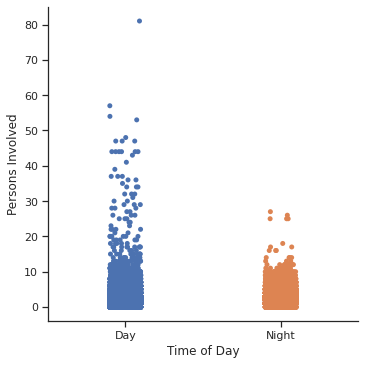

In [91]:
sns.catplot(x="Time of Day", y="Persons Involved"  ,data=unscaled_features_df)

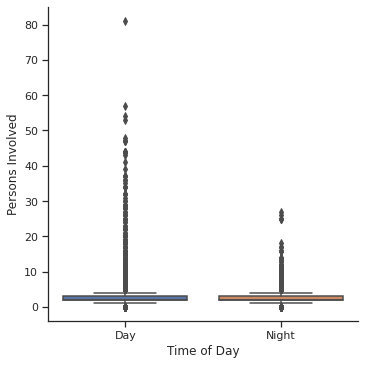

In [92]:
sns.catplot(x="Time of Day", y="Persons Involved" , data=unscaled_features_df, kind="box")

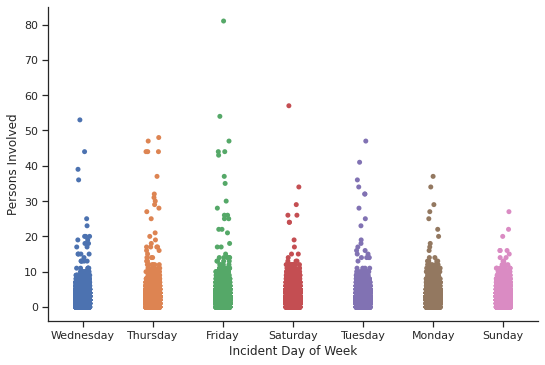

In [93]:
sns.catplot(x="Incident Day of Week", y="Persons Involved" , data=unscaled_features_df, aspect=1.5)

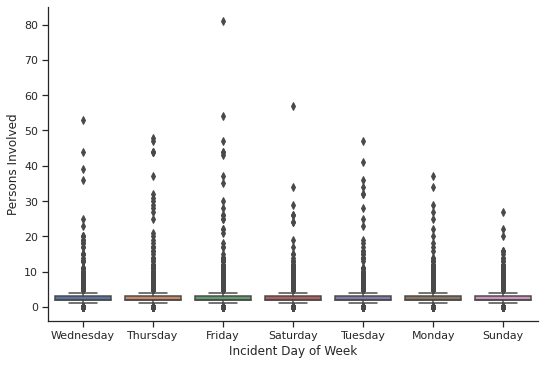

In [94]:
sns.catplot(x="Incident Day of Week", y="Persons Involved" , data=unscaled_features_df, aspect=1.5, kind='box')

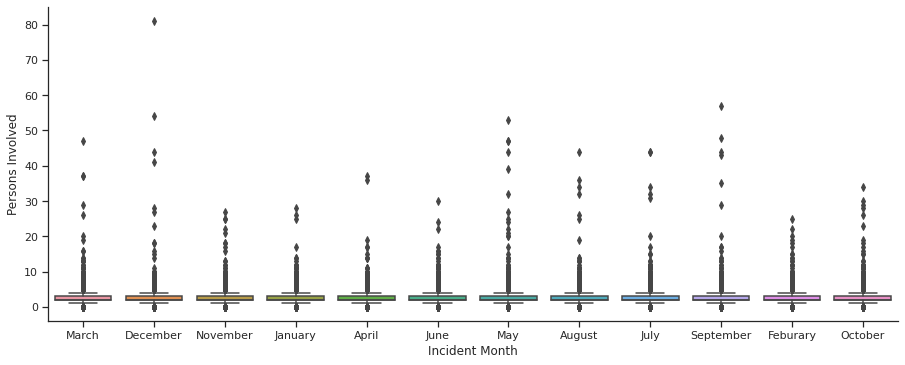

In [95]:
sns.catplot(x="Incident Month", y="Persons Involved" , data=unscaled_features_df, aspect=2.5, kind='box')

### Charting Vehicles Involved for Different Days, Months, and Times of Day

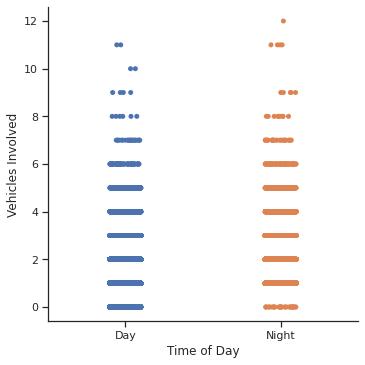

In [96]:
sns.catplot(x="Time of Day", y="Vehicles Involved"  ,data=unscaled_features_df)

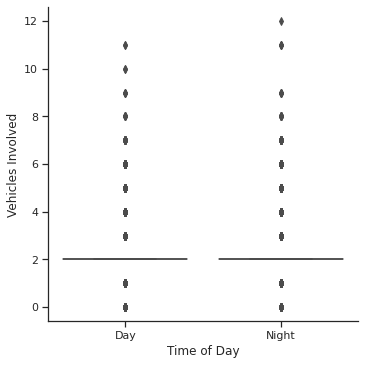

In [97]:
sns.catplot(x="Time of Day", y="Vehicles Involved"  ,data=unscaled_features_df, kind='box')

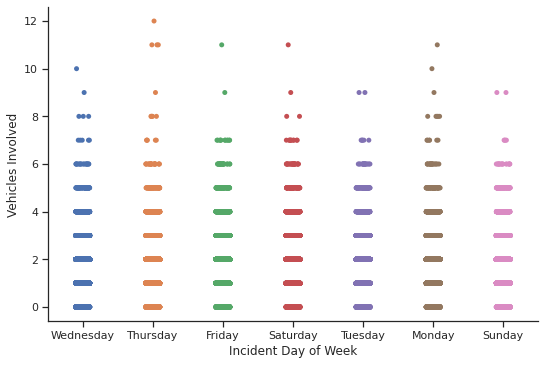

In [98]:
sns.catplot(x="Incident Day of Week", y="Vehicles Involved" , data=unscaled_features_df, aspect=1.5)

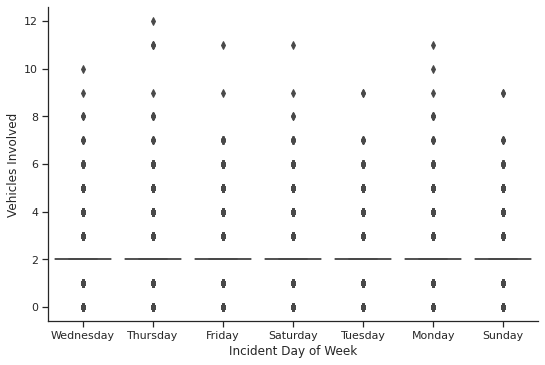

In [99]:
sns.catplot(x="Incident Day of Week", y="Vehicles Involved" , data=unscaled_features_df, aspect=1.5, kind='box')

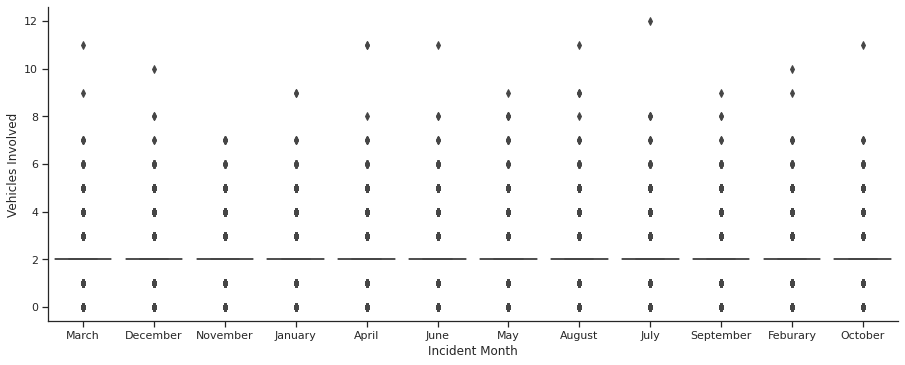

In [100]:
sns.catplot(x="Incident Month", y="Vehicles Involved" , data=unscaled_features_df, aspect=2.5, kind='box')

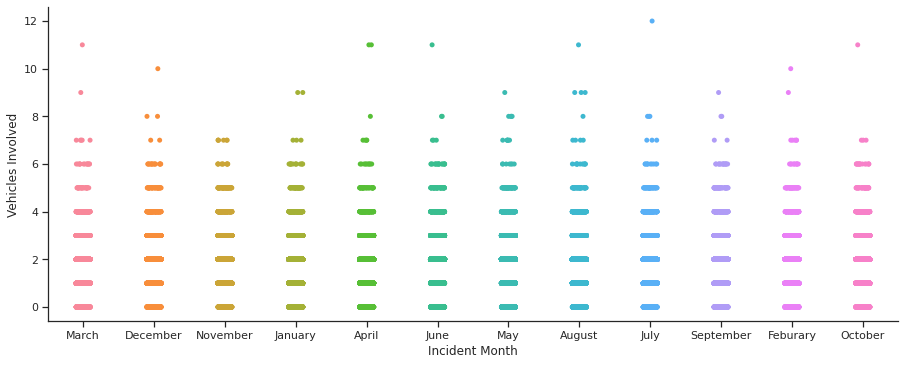

In [101]:
sns.catplot(x="Incident Month", y="Vehicles Involved" , data=unscaled_features_df, aspect=2.5)

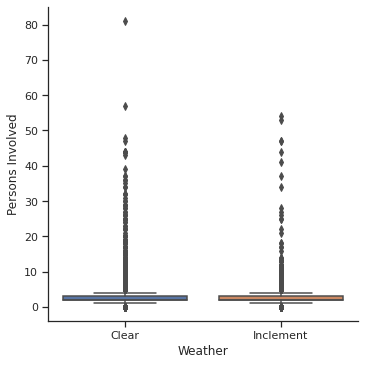

In [102]:
sns.catplot(x="Weather", y="Persons Involved"  ,data=unscaled_features_df , kind='box')

In [103]:
unscaled_features_df

,X,Y,Incident Month,Incident Day of Week,Road Condition,Weather,Time of Day,Drunk Driving Incident,Vehicles Involved,Persons Involved,Bicycle Involved,Pedestrians Involved,Accident Location
0,-122.323148,47.703140,March,Wednesday,Hazardous,Clear,Day,No,2,2,0,0,Intersection
1,-122.347294,47.647172,December,Wednesday,Hazardous,Inclement,Night,No,2,2,0,0,Block
2,-122.334540,47.607871,November,Thursday,Fair,Clear,Day,No,3,4,0,0,Block
3,-122.334803,47.604803,March,Friday,Fair,Clear,Day,No,3,3,0,0,Block
4,-122.306426,47.545739,January,Wednesday,Hazardous,Inclement,Day,No,2,2,0,0,Intersection
...,...,...,...,...,...,...,...,...,...,...,...,...,...
194668,-122.290826,47.565408,November,Monday,Fair,Clear,Day,No,2,3,0,0,Block
194669,-122.344526,47.690924,December,Tuesday,Hazardous,Inclement,Day,No,2,2,0,0,Block
194670,-122.306689,47.683047,January,Saturday,Fair,Clear,Day,No,2,3,0,0,Intersection
194671,-122.355317,47.678734,January,Tuesday,Fair,Clear,Day,No,1,2,1,0,Intersection


In [104]:
day_v_accidents = unscaled_features_df['Incident Day of Week'].value_counts().to_frame()
day_v_accidents_df = day_v_accidents.reset_index().rename(columns={'Incident Day of Week': 'Accidents' , 'index' : 'Day'})

In [105]:
day_v_accidents_df = day_v_accidents_df.reindex([6,5,3, 2, 1, 0, 4])

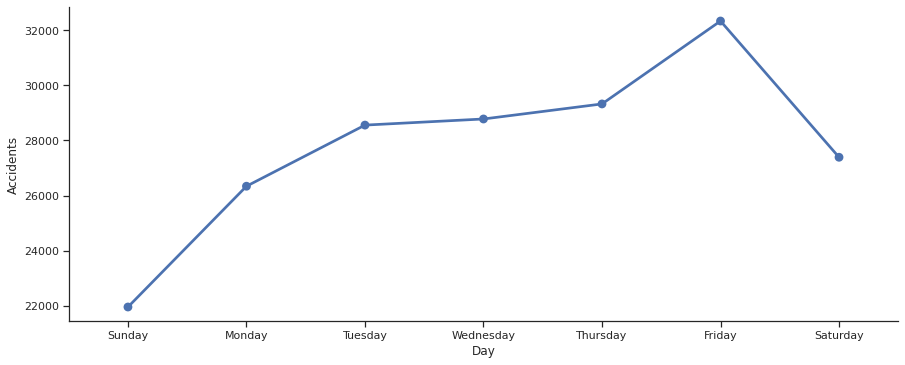

In [106]:
sns.catplot(x='Day', y="Accidents" , data=day_v_accidents_df, aspect=2.5 , kind='point')

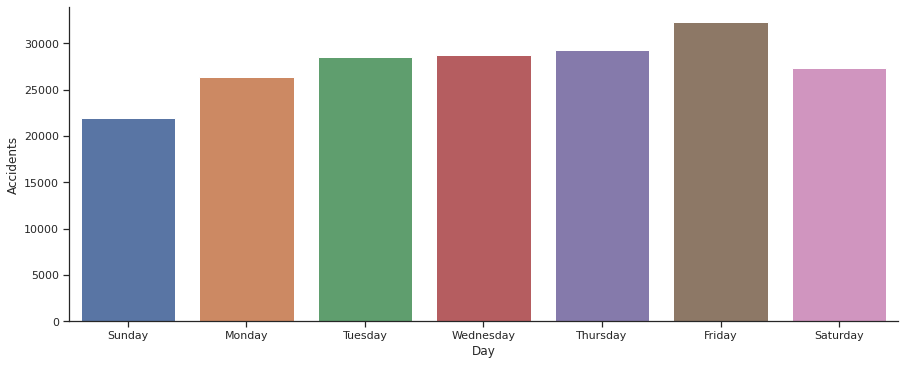

In [107]:
sns.catplot(x='Day', y="Accidents" , data=day_v_accidents_df, aspect=2.5 , kind='bar')

In [108]:
month_v_accidents = unscaled_features_df['Incident Month'].value_counts().to_frame()
month_v_accidents_df = month_v_accidents.reset_index().rename(columns={'Incident Month': 'Accidents' , 'index' : 'Month'})
month_v_accidents_df

,Month,Accidents
0,October,17768
1,May,16763
2,November,16582
3,June,16566
4,January,16407
5,July,16364
6,August,16296
7,March,16150
8,April,15978
9,September,15864


In [109]:
month_v_accidents_df = month_v_accidents_df.reindex([4,11,7,8,1,3,5,6,9,0,2,10])

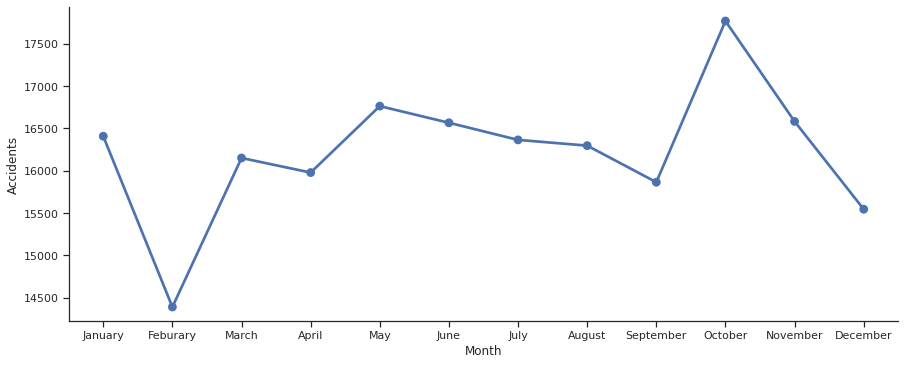

In [110]:
sns.catplot(x='Month', y="Accidents" , data=month_v_accidents_df, aspect=2.5 , kind='point')

<AxesSubplot:xlabel='Victims', ylabel='Accidents'>

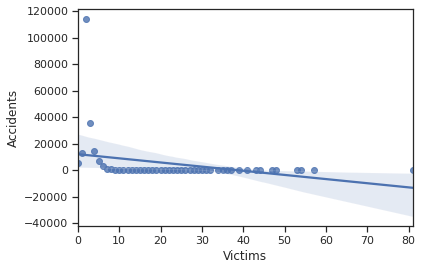

In [112]:
person_v_accidents = unscaled_features_df['Persons Involved'].value_counts().to_frame()
person_v_accidents_df = person_v_accidents.reset_index().rename(columns={'Persons Involved' : 'Accidents', 'index':'Victims'})
sns.regplot(x='Victims', y='Accidents', data=person_v_accidents_df)

<AxesSubplot:xlabel='Vehicles', ylabel='Accidents'>

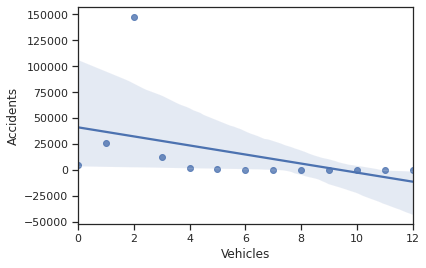

In [113]:
vehicle_v_accidents = unscaled_features_df['Vehicles Involved'].value_counts().to_frame()
vehicle_v_accidents_df = vehicle_v_accidents.reset_index().rename(columns={'Vehicles Involved' : 'Accidents', 'index':'Vehicles'})
sns.regplot(x='Vehicles', y='Accidents', data=vehicle_v_accidents_df)

In [340]:
unscaled_features_df['y'] = accident_df['SEVERITYCODE']

<AxesSubplot:xlabel='Vehicles Involved', ylabel='y'>

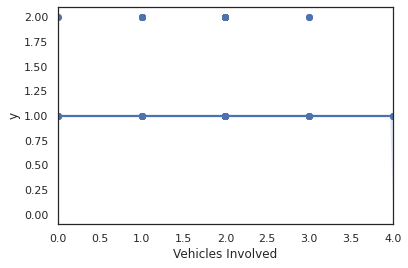

In [342]:
sns.regplot(x="Vehicles Involved", y="y", data=unscaled_features_df[:100], logistic=True)

In [293]:
weather_v_accidents = unscaled_features_df['Weather'].value_counts().to_frame()

In [294]:
weather_v_accidents

,Weather
Clear,159858
Inclement,34815


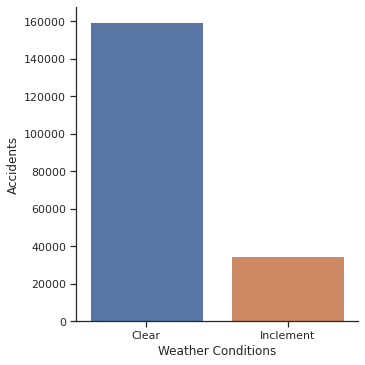

In [296]:
weather_v_accidents_df = weather_v_accidents.reset_index().rename(columns={'Weather' : 'Accidents', 'index':'Weather Conditions'})
sns.catplot(x='Weather Conditions', y='Accidents', data=weather_v_accidents_df, kind='bar')

In [318]:
unscaled_features_df.loc[(unscaled_features_df['Incident Day of Week'] == 'Friday') & (unscaled_features_df['Drunk Driving Incident'] == 'Yes')].count()

X                         1454
Y                         1454
Incident Month            1497
Incident Day of Week      1497
Road Condition            1497
Weather                   1497
Time of Day               1497
Drunk Driving Incident    1497
Vehicles Involved         1497
Persons Involved          1497
Bicycle Involved          1497
Pedestrians Involved      1497
Accident Location         1497
dtype: int64

In [314]:
unscaled_features_df.loc[(unscaled_features_df['Incident Day of Week'] == 'Thursday') & (unscaled_features_df['Drunk Driving Incident'] == 'Yes')].count()

X                         1093
Y                         1093
Incident Month            1123
Incident Day of Week      1123
Road Condition            1123
Weather                   1123
Time of Day               1123
Drunk Driving Incident    1123
Vehicles Involved         1123
Persons Involved          1123
Bicycle Involved          1123
Pedestrians Involved      1123
Accident Location         1123
dtype: int64

In [319]:
unscaled_features_df.loc[(unscaled_features_df['Incident Day of Week'] == 'Wednesday') & (unscaled_features_df['Drunk Driving Incident'] == 'Yes')].count()

X                         972
Y                         972
Incident Month            992
Incident Day of Week      992
Road Condition            992
Weather                   992
Time of Day               992
Drunk Driving Incident    992
Vehicles Involved         992
Persons Involved          992
Bicycle Involved          992
Pedestrians Involved      992
Accident Location         992
dtype: int64

In [320]:
unscaled_features_df.loc[(unscaled_features_df['Incident Day of Week'] == 'Saturday') & (unscaled_features_df['Drunk Driving Incident'] == 'Yes')].count()

X                         1949
Y                         1949
Incident Month            2000
Incident Day of Week      2000
Road Condition            2000
Weather                   2000
Time of Day               2000
Drunk Driving Incident    2000
Vehicles Involved         2000
Persons Involved          2000
Bicycle Involved          2000
Pedestrians Involved      2000
Accident Location         2000
dtype: int64

## Create Models and Process

In [114]:
y = accident_df['SEVERITYCODE']

In [115]:
y

0         2
1         1
2         1
3         1
4         2
         ..
194668    2
194669    1
194670    2
194671    2
194672    1
Name: SEVERITYCODE, Length: 194673, dtype: int64

In [116]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y

array([1, 0, 0, ..., 1, 1, 0])

In [117]:
X = features_vectorized_df

#### Make sure there are no 'NaN' values

In [118]:
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
X = imputer.fit_transform(X)

#### Test, Train, Dev split

In [119]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)


<br>

## Logistic Regression

In [120]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression(max_iter=1000, C=10)

# k-fold cross validation
results = cross_validate(logistic_regression, X_train, y_train, cv=3, return_estimator=True , return_train_score = True)
results

{'fit_time': array([1.13234854, 1.71277666, 1.77071667]),
 'score_time': array([0.00481987, 0.00462127, 0.01173902]),
 'estimator': (LogisticRegression(C=10, max_iter=1000),
  LogisticRegression(C=10, max_iter=1000),
  LogisticRegression(C=10, max_iter=1000)),
 'test_score': array([0.75240574, 0.75033389, 0.75163097]),
 'train_score': array([0.75104235, 0.75186425, 0.75172939])}

In [121]:
#Select the best scoring model from cross-validation
regression_models = results['estimator']
best_model_score = np.argmax(results['test_score'])
model = regression_models[best_model_score]

<br>
<strong>Accuracy measure</strong>

In [122]:
#Test the model on the test set
model.score(X_test, y_test)

0.7534415450996507

In [123]:
prediction = model.predict(X_test)

As you can see, our model is predicting both classes to some degree of success

In [124]:
np.unique(prediction) 

array([0, 1])

<br>
<strong>ROC of AUC</strong>

In [125]:
from sklearn.metrics import roc_auc_score

# generate the ROC
probability = model.predict_proba(X_test)
probability_class_1 = [p[1] for p in probability]

roc_auc_score(y_test, probability_class_1)

0.714569247608215

<br>
<strong>F1 Score</strong>

In [122]:
from sklearn.metrics import f1_score

f1_score(y_test, prediction)

0.3639014047177312

Not a good score, not at all

## Attempt to improve Logistic Regression by Oversampling the Injury classes

We will increase the representation of the under represented class by doubling its population in the dataset,

In [123]:
len(y_train)

175205

In [124]:
injury_severity_indices = [index for index, element in enumerate(y_train) if element == 1]

injury_X_train = X_train[injury_severity_indices]
injury_X_train.shape

(52427, 36)

In [125]:
len(injury_severity_indices)

52427

In [126]:
X_train.shape

(175205, 36)

In [127]:
oversampled_X_train = np.vstack((X_train, injury_X_train))
oversampled_X_train.shape

(227632, 36)

In [128]:
y_train.shape

(175205,)

In [129]:
np.ones(52427)

array([1., 1., 1., ..., 1., 1., 1.])

In [130]:
oversampled_y_train = np.append(y_train, np.ones(52427))

In [131]:
oversampled_y_train.shape

(227632,)

<br>

## Oversampled Logistic Classification

In [132]:
logistic_regression = LogisticRegression(max_iter=1000, C=10)

# k-fold cross validation
results = cross_validate(logistic_regression, oversampled_X_train, oversampled_y_train, cv=3, return_estimator=True, return_train_score = True)
results

{'fit_time': array([1.302845  , 2.41115189, 1.81480265]),
 'score_time': array([0.01075602, 0.0079155 , 0.0081296 ]),
 'estimator': (LogisticRegression(C=10, max_iter=1000),
  LogisticRegression(C=10, max_iter=1000),
  LogisticRegression(C=10, max_iter=1000)),
 'test_score': array([0.6632489 , 0.6639825 , 0.66219012]),
 'train_score': array([0.66334331, 0.66235709, 0.66347073])}

In [133]:
#Select the best scoring model from cross-validation
regression_models = results['estimator']
best_model_score = np.argmax(results['test_score'])
model = regression_models[best_model_score]

<br>
<strong>Accuracy Measure</strong>

In [134]:
#Test the model on the test set
model.score(X_test, y_test)

0.7142490240394493

In [135]:
prediction = model.predict(X_test)

As you can see, our model is predicting both classes to some degree of success

In [136]:
np.unique(prediction) #the prediction is selecting both classes

array([0., 1.])

<br>
<strong>ROC of AUC</strong>

In [137]:
from sklearn.metrics import roc_auc_score

# generate the ROC
probability = model.predict_proba(X_test)
probability_class_1 = [p[1] for p in probability]

roc_auc_score(y_test, probability_class_1)

0.7150041814817403

<br>
<strong> F1 Score</strong>

In [138]:
from sklearn.metrics import f1_score

f1_score(y_test, prediction)

0.49724356077722554

## Simple Logistic Regression Model without Oversampling or Cross-validation

In [139]:
logistic_regression = LogisticRegression(max_iter=1000, C=100)

model = logistic_regression.fit(X_train, y_train)

model.score(X_test, y_test)

0.7536470104787343

In [140]:
prediction = model.predict(X_test)

As you can see, our model is predicting both classes to some degree of success

In [141]:
np.unique(prediction) #the prediction is selecting both classes

array([0, 1])

<br>
<strong> ROC of AUC</strong>

In [142]:
from sklearn.metrics import roc_auc_score

# generate the ROC
probability = model.predict_proba(X_test)
probability_class_1 = [p[1] for p in probability]

roc_auc_score(y_test, probability_class_1)

0.7147915584001713

<br>
<strong>F1 Score</strong>

In [143]:
from sklearn.metrics import f1_score

f1_score(y_test, prediction)

0.3649364406779661

<br>

## SGDClassifier

In [144]:
from sklearn.linear_model import SGDClassifier

sgd_classifier = SGDClassifier(max_iter=1000, learning_rate='optimal')

# k-fold
results = cross_validate(sgd_classifier, X_train, y_train, cv=3, return_estimator=True , return_train_score = True)
results

{'fit_time': array([0.35456061, 0.36660242, 0.36775732]),
 'score_time': array([0.01366019, 0.00479341, 0.0061028 ]),
 'estimator': (SGDClassifier(), SGDClassifier(), SGDClassifier()),
 'test_score': array([0.75084757, 0.74970035, 0.7494221 ]),
 'train_score': array([0.74956123, 0.75012628, 0.75027396])}

In [145]:
#Select the best scoring model from cross-validation
regression_models = results['estimator']
best_model_score = np.argmax(results['test_score'])
model = regression_models[best_model_score]

<br>
<strong>Accuracy</strong>

In [146]:
#Test the model on the test set
model.score(X_test, y_test)

0.7533388124101089

In [147]:
prediction = model.predict(X_test)

As you can see, our model is predicting both classes to some degree of success

In [148]:
np.unique(prediction) #the prediction is selecting both classes

array([0, 1])

<br>
<strong>ROC of AUC </strong>

In [149]:
from sklearn.metrics import roc_auc_score
from sklearn.calibration import CalibratedClassifierCV

model = CalibratedClassifierCV(model)
model.fit(X_test, y_test)

# generate the ROC
probability = model.predict_proba(X_test)
probability_class_1 = [p[1] for p in probability]

roc_auc_score(y_test, probability_class_1)

0.7006237315193786

<br>
<strong>F1 Score </strong>

In [150]:
from sklearn.metrics import f1_score

f1_score(y_test, prediction)

0.314

<br>

## Oversampled data

In [151]:
from sklearn.linear_model import SGDClassifier

sgd_classifier = SGDClassifier(max_iter=1000, learning_rate='optimal')

# k-fold
results = cross_validate(sgd_classifier, oversampled_X_train, oversampled_y_train, cv=3, return_estimator=True , return_train_score = True)
results

{'fit_time': array([0.44430614, 0.50539494, 0.48066878]),
 'score_time': array([0.01091003, 0.00994754, 0.00821805]),
 'estimator': (SGDClassifier(), SGDClassifier(), SGDClassifier()),
 'test_score': array([0.64307177, 0.6422236 , 0.6384148 ]),
 'train_score': array([0.64039169, 0.64073671, 0.64260815])}

In [152]:
#Select the best scoring model from cross-validation
regression_models = results['estimator']
best_model_score = np.argmax(results['test_score'])
model = regression_models[best_model_score]

<br>
<strong>Accuracy</strong>

In [153]:
#Test the model on the test set
model.score(X_test, y_test)

0.6695089377439901

In [154]:
prediction = model.predict(X_test)

As you can see, our model is predicting both classes to some degree of success

In [155]:
np.unique(prediction) #the prediction is selecting both classes

array([0., 1.])

<br>
<strong>ROC of AUC </strong>

In [156]:
from sklearn.metrics import roc_auc_score
from sklearn.calibration import CalibratedClassifierCV

model = CalibratedClassifierCV(model)
model.fit(X_test, y_test)

# generate the ROC
probability = model.predict_proba(X_test)
probability_class_1 = [p[1] for p in probability]

roc_auc_score(y_test, probability_class_1)

0.699190912821282

<br>
<strong>F1 Score </strong>

In [157]:
from sklearn.metrics import f1_score

f1_score(y_test, prediction)

0.49234653621587504

<br/>

## Support Vector Machine with Linear Kernel

In [158]:
from sklearn.svm import LinearSVC

svc = LinearSVC(random_state=0, tol=1e-5)

# k-fold
results = cross_validate(svc, X_train, y_train, cv=3, return_estimator=True , return_train_score = True)
results

{'fit_time': array([3.36870289, 3.52005982, 3.37292719]),
 'score_time': array([0.00471902, 0.00470734, 0.00464129]),
 'estimator': (LinearSVC(random_state=0, tol=1e-05),
  LinearSVC(random_state=0, tol=1e-05),
  LinearSVC(random_state=0, tol=1e-05)),
 'test_score': array([0.75208041, 0.7508647 , 0.75104878]),
 'train_score': array([0.7509653 , 0.75154748, 0.75132701])}

In [159]:
#Select the best scoring model from cross-validation
regression_models = results['estimator']
best_model_score = np.argmax(results['test_score'])
model = regression_models[best_model_score]

<br>
<strong>Accuracy</strong>

In [160]:
#Test the model on the test set
model.score(X_test, y_test)

0.7539038422025889

In [161]:
prediction = model.predict(X_test)

As you can see, our model is predicting both classes to some degree of success

In [162]:
np.unique(prediction) #the prediction is selecting both classes

array([0, 1])

<br>
<strong>ROC of AUC </strong>

In [163]:
from sklearn.metrics import roc_auc_score
from sklearn.calibration import CalibratedClassifierCV

model = CalibratedClassifierCV(model)
model.fit(X_test, y_test)

# generate the ROC
probability = model.predict_proba(X_test)
probability_class_1 = [p[1] for p in probability]

roc_auc_score(y_test, probability_class_1)

0.7139436494633318

<br>
<strong>F1 Score </strong>

In [164]:
from sklearn.metrics import f1_score

f1_score(y_test, prediction)

0.34504442925495554

<br>

## Simple Linear SVM

In [165]:
svc = LinearSVC(random_state=0, tol=1e-5)

model = svc.fit(X_train, y_train)
model.score(X_test, y_test)

0.7541093075816725

<br>
<strong>ROC of AUC </strong>

In [166]:
from sklearn.metrics import roc_auc_score
from sklearn.calibration import CalibratedClassifierCV

model = CalibratedClassifierCV(model)
model.fit(X_test, y_test)

# generate the ROC
probability = model.predict_proba(X_test)
probability_class_1 = [p[1] for p in probability]

roc_auc_score(y_test, probability_class_1)

0.7139436494633318

<br>
<strong>F1 Score </strong>

In [167]:
prediction = model.predict(X_test)

In [168]:
from sklearn.metrics import f1_score

f1_score(y_test, prediction)

0.3443835616438356

<br>

## Oversampled LinearSVC

In [169]:
svc = LinearSVC(random_state=0, tol=1e-5)

# k-fold
results = cross_validate(svc, oversampled_X_train, oversampled_y_train, cv=3, return_estimator=True , return_train_score = True)
results

{'fit_time': array([8.07413721, 7.90354633, 5.10015893]),
 'score_time': array([0.01806474, 0.00793004, 0.01888585]),
 'estimator': (LinearSVC(random_state=0, tol=1e-05),
  LinearSVC(random_state=0, tol=1e-05),
  LinearSVC(random_state=0, tol=1e-05)),
 'test_score': array([0.66258995, 0.66349487, 0.6609381 ]),
 'train_score': array([0.66240099, 0.66182992, 0.6623505 ])}

In [170]:
#Select the best scoring model from cross-validation
regression_models = results['estimator']
best_model_score = np.argmax(results['test_score'])
model = regression_models[best_model_score]

<br>
<strong>Accuracy</strong>

In [171]:
#Test the model on the test set
model.score(X_test, y_test)

0.719334292171769

In [172]:
prediction = model.predict(X_test)

As you can see, our model is predicting both classes to some degree of success

In [173]:
np.unique(prediction) #the prediction is selecting both classes

array([0., 1.])

<br>
<strong>ROC of AUC </strong>

In [174]:
from sklearn.metrics import roc_auc_score
from sklearn.calibration import CalibratedClassifierCV

model = CalibratedClassifierCV(model)
model.fit(X_test, y_test)

# generate the ROC
probability = model.predict_proba(X_test)
probability_class_1 = [p[1] for p in probability]

roc_auc_score(y_test, probability_class_1)

0.7139436494633318

<br>
<strong>F1 Score </strong>

In [175]:
from sklearn.metrics import f1_score

f1_score(y_test, prediction)

0.49341739291674386

<br>

# Random Forest Classifier

In [176]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()

# k-fold
results = cross_validate(random_forest, X_train, y_train, cv=3, return_estimator=True , return_train_score = True)
results

{'fit_time': array([11.93122673, 12.09776926, 12.09217119]),
 'score_time': array([1.13856721, 1.12852192, 1.12324882]),
 'estimator': (RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier()),
 'test_score': array([0.7251464 , 0.72631074, 0.72536429]),
 'train_score': array([0.99361318, 0.99339914, 0.99393   ])}

In [177]:
#Select the best scoring model from cross-validation
regression_models = results['estimator']
best_model_score = np.argmax(results['test_score'])
model = regression_models[best_model_score]

<br>
<strong>Accuracy</strong>

In [178]:
#Test the model on the test setprediction = model.predict(X_test)
model.score(X_test, y_test)

0.7300184918841175

In [179]:
prediction = model.predict(X_test)

As you can see, our model is predicting both classes to some degree of success

In [180]:
np.unique(prediction) #the prediction is selecting both classes

array([0, 1])

<br>
<strong>ROC of AUC </strong>

In [181]:
from sklearn.metrics import roc_auc_score
from sklearn.calibration import CalibratedClassifierCV

model = CalibratedClassifierCV(model)
model.fit(X_test, y_test)

# generate the ROC
probability = model.predict_proba(X_test)
probability_class_1 = [p[1] for p in probability]

roc_auc_score(y_test, probability_class_1)

0.9997662475788481

<br>
<strong>F1 Score </strong>

In [182]:
from sklearn.metrics import f1_score

f1_score(y_test, prediction)

0.44439746300211413

<br>


## RandomForest Classifier with over sampling

In [183]:
random_forest = RandomForestClassifier()

# k-fold
results = cross_validate(random_forest, oversampled_X_train, oversampled_y_train, cv=3, return_estimator=True , return_train_score = True)
results

{'fit_time': array([16.2805717 , 16.17411733, 16.16124105]),
 'score_time': array([1.49397445, 1.50537705, 1.49204302]),
 'estimator': (RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier()),
 'test_score': array([0.85856243, 0.86316011, 0.85599062]),
 'train_score': array([0.992132  , 0.99232974, 0.99250107])}

In [184]:
#Select the best scoring model from cross-validation
regression_models = results['estimator']
best_model_score = np.argmax(results['test_score'])
model = regression_models[best_model_score]

<br>
<strong>Accuracy</strong>

In [185]:
#Test the model on the test set
model.score(X_test, y_test)

0.6835833162112184

In [186]:
prediction = model.predict(X_test)

As you can see, our model is predicting both classes to some degree of success

In [187]:
np.unique(prediction) #the prediction is selecting both classes

array([0., 1.])

<br>
<strong>ROC of AUC </strong>

In [188]:
from sklearn.metrics import roc_auc_score
from sklearn.calibration import CalibratedClassifierCV

model = CalibratedClassifierCV(model)
model.fit(X_test, y_test)

# generate the ROC
probability = model.predict_proba(X_test)
probability_class_1 = [p[1] for p in probability]

roc_auc_score(y_test, probability_class_1)

0.9997734532091882

<br>
<strong>F1 Score </strong>

In [189]:
from sklearn.metrics import f1_score

f1_score(y_test, prediction)

0.4954128440366972

## Gradient Boosting Classifier

In [190]:
from sklearn.ensemble import GradientBoostingClassifier

gradient_classifier = GradientBoostingClassifier()

# k-fold
results = cross_validate(gradient_classifier, X_train, y_train, cv=3, return_estimator=True , return_train_score = True)
results

{'fit_time': array([16.05677581, 15.95720506, 15.90672565]),
 'score_time': array([0.06158686, 0.06054211, 0.06377387]),
 'estimator': (GradientBoostingClassifier(),
  GradientBoostingClassifier(),
  GradientBoostingClassifier()),
 'test_score': array([0.75605287, 0.75449471, 0.75368572]),
 'train_score': array([0.75541724, 0.75652166, 0.75617273])}

In [191]:
#Select the best scoring model from cross-validation
regression_models = results['estimator']
best_model_score = np.argmax(results['test_score'])
model = regression_models[best_model_score]

<br>
<strong>Accuracy</strong>

In [192]:
#Test the model on the test set
model.score(X_test, y_test)

0.7563180604068215

In [193]:
prediction = model.predict(X_test)

As you can see, our model is predicting both classes to some degree of success

In [194]:
np.unique(prediction) #the prediction is selecting both classes

array([0, 1])

<br>
<strong>ROC of AUC </strong>

In [195]:
from sklearn.metrics import roc_auc_score
from sklearn.calibration import CalibratedClassifierCV

model = CalibratedClassifierCV(model)
model.fit(X_test, y_test)

# generate the ROC
probability = model.predict_proba(X_test)
probability_class_1 = [p[1] for p in probability]

roc_auc_score(y_test, probability_class_1)

0.7589945420452773

<br>
<strong>F1 Score </strong>

In [196]:
from sklearn.metrics import f1_score

f1_score(y_test, prediction)

0.37889499869075677

<br>

## Gradient Classifier with Oversampling

In [197]:
gradient_classifier = GradientBoostingClassifier()

# k-fold
results = cross_validate(gradient_classifier, oversampled_X_train, oversampled_y_train, cv=3, return_estimator=True , return_train_score = True)
results

{'fit_time': array([22.5060184 , 22.61536407, 23.06629014]),
 'score_time': array([0.0880177 , 0.08754945, 0.08941317]),
 'estimator': (GradientBoostingClassifier(),
  GradientBoostingClassifier(),
  GradientBoostingClassifier()),
 'test_score': array([0.6755186 , 0.67858508, 0.67564611]),
 'train_score': array([0.67820288, 0.67823795, 0.67711113])}

In [198]:
#Select the best scoring model from cross-validation
regression_models = results['estimator']
best_model_score = np.argmax(results['test_score'])
model = regression_models[best_model_score]

<br>
<strong>Accuracy</strong>

In [199]:
#Test the model on the test set
model.score(X_test, y_test)

0.7175364701047874

In [200]:
prediction = model.predict(X_test)

As you can see, our model is predicting both classes to some degree of success

In [201]:
np.unique(prediction) #the prediction is selecting both classes

array([0., 1.])

<br>
<strong>ROC of AUC </strong>

In [202]:
from sklearn.metrics import roc_auc_score
from sklearn.calibration import CalibratedClassifierCV

model = CalibratedClassifierCV(model)
model.fit(X_test, y_test)

# generate the ROC
probability = model.predict_proba(X_test)
probability_class_1 = [p[1] for p in probability]

roc_auc_score(y_test, probability_class_1)

0.7589878176345379

<br>
<strong>F1 Score </strong>

In [203]:
from sklearn.metrics import f1_score

f1_score(y_test, prediction)

0.5398711404903356

<br>

## Simple GradientBoosting Classifier

In [204]:
gradient_classifier = GradientBoostingClassifier()

model = gradient_classifier.fit(X_train, y_train)

model.score(X_test, y_test)

0.7566262584754468

<br>
<strong>Accuracy</strong>

In [205]:
#Test the model on the test set
model.score(X_test, y_test)

0.7566262584754468

In [206]:
prediction = model.predict(X_test)

As you can see, our model is predicting both classes to some degree of success

In [207]:
np.unique(prediction) #the prediction is selecting both classes

array([0, 1])

<br>
<strong>ROC of AUC </strong>

In [208]:
from sklearn.metrics import roc_auc_score
from sklearn.calibration import CalibratedClassifierCV

model = CalibratedClassifierCV(model)
model.fit(X_test, y_test)

# generate the ROC
probability = model.predict_proba(X_test)
probability_class_1 = [p[1] for p in probability]

roc_auc_score(y_test, probability_class_1)

0.7589889573651718

<br>
<strong>F1 Score </strong>

In [209]:
from sklearn.metrics import f1_score

f1_score(y_test, prediction)

0.38000523423187643

In [210]:
features_vectorized_df.corr()

,X,Y,Vehicles Involved,Persons Involved,Bicycle Involved,Pedestrians Involved,road_condition_Fair,road_condition_Hazardous,weather_condition_Clear,weather_condition_Inclement,...,month_of_year_November,month_of_year_October,month_of_year_September,day_of_the_week_Friday,day_of_the_week_Monday,day_of_the_week_Saturday,day_of_the_week_Sunday,day_of_the_week_Thursday,day_of_the_week_Tuesday,day_of_the_week_Wednesday
X,1.000000,-0.160262,-0.012168,0.012887,-0.001752,0.011304,-0.010777,0.010777,-0.003662,0.003662,...,-0.000226,0.001309,0.005414,0.000743,0.004197,-0.006768,-0.006821,0.005308,0.000539,0.001999
Y,-0.160262,1.000000,0.017058,-0.013850,0.026304,0.010178,0.010950,-0.010950,0.011823,-0.011823,...,0.002564,0.009267,-0.000789,0.000238,0.000485,0.001671,-0.010709,0.003658,0.000407,0.003092
Vehicles Involved,-0.012168,0.017058,1.000000,0.380523,-0.253773,-0.261285,-0.026530,0.026530,-0.021498,0.021498,...,0.001126,0.001345,0.006300,0.001584,-0.005581,0.007041,0.004562,0.002322,-0.006207,-0.003399
Persons Involved,0.012887,-0.013850,0.380523,1.000000,-0.038809,-0.023464,-0.019050,0.019050,-0.020758,0.020758,...,0.002974,-0.005295,-0.025409,0.002249,-0.019810,0.048160,0.033959,-0.016265,-0.025319,-0.019084
Bicycle Involved,-0.001752,0.026304,-0.253773,-0.038809,1.000000,-0.016920,0.032381,-0.032381,0.030381,-0.030381,...,-0.012947,0.000165,0.014311,-0.001564,-0.000338,-0.016467,-0.022148,0.009389,0.014680,0.013742
Pedestrians Involved,0.011304,0.010178,-0.261285,-0.023464,-0.016920,1.000000,-0.025954,0.025954,-0.031659,0.031659,...,0.016174,0.004241,-0.006081,0.003495,0.009006,-0.014703,-0.014292,0.003691,0.005895,0.005201
road_condition_Fair,-0.010777,0.010950,-0.026530,-0.019050,0.032381,-0.025954,1.000000,-1.000000,0.759250,-0.759250,...,-0.132691,-0.049208,0.069163,-0.003520,0.010306,-0.012337,-0.011033,-0.004712,0.012424,0.008041
road_condition_Hazardous,0.010777,-0.010950,0.026530,0.019050,-0.032381,0.025954,-1.000000,1.000000,-0.759250,0.759250,...,0.132691,0.049208,-0.069163,0.003520,-0.010306,0.012337,0.011033,0.004712,-0.012424,-0.008041
weather_condition_Clear,-0.003662,0.011823,-0.021498,-0.020758,0.030381,-0.031659,0.759250,-0.759250,1.000000,-1.000000,...,-0.113494,-0.050519,0.051009,0.000194,0.010591,-0.014218,-0.009518,-0.006061,0.013030,0.005122
weather_condition_Inclement,0.003662,-0.011823,0.021498,0.020758,-0.030381,0.031659,-0.759250,0.759250,-1.000000,1.000000,...,0.113494,0.050519,-0.051009,-0.000194,-0.010591,0.014218,0.009518,0.006061,-0.013030,-0.005122


<AxesSubplot:>

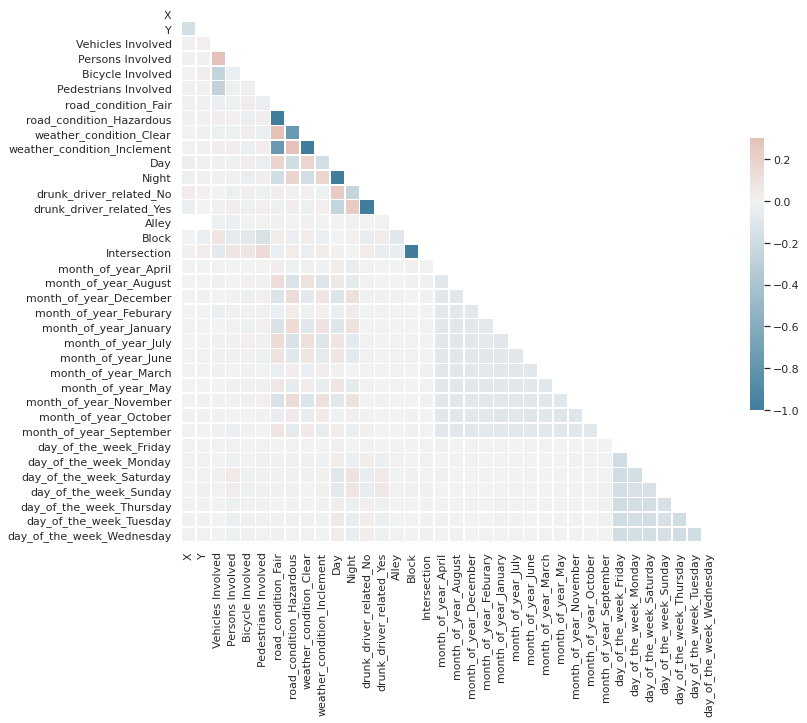

In [211]:
sns.set_theme(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)
d = features_vectorized_df

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Dimensional Increase 

**Summary** 

The below dataframe represents adding an additional 23 features to the input matrix X to our classification. It would appear adding more features did not improve
the accuracy of our models. 

This dataframe was not reduced categorically, but instead expanded back to its original category sets and one hot encoded.



In [212]:
features2 = {'X' : X_scaled, 'Y' : Y_scaled, 'Incident Month' : months, 'Incident Day of Week' : days_of_week, 'Road Condition' : accident_df['ROADCOND'], 'Weather' : accident_df['WEATHER'], 'Time of Day' : accident_df['LIGHTCOND'] , 'Drunk Driving Incident': under_the_influence, 'Vehicles Involved': vehicle_count , 'Persons Involved': person_count , "Bicycle Involved" : cyclist_count ,"Pedestrians Involved" : pedestrian_count,  "Accident Location": accident_location}

In [213]:
features2_df = pd.DataFrame(features2)

In [214]:
features2_df # this dataframe consists of the EXPANDED set of features. This dataframe is much bigger than the one used for prior predictions

,X,Y,Incident Month,Incident Day of Week,Road Condition,Weather,Time of Day,Drunk Driving Incident,Vehicles Involved,Persons Involved,Bicycle Involved,Pedestrians Involved,Accident Location
0,0.532596,0.870053,March,Wednesday,Wet,Overcast,Daylight,No,0.166667,0.024691,0.0,0.0,Intersection
1,0.398557,0.635455,December,Wednesday,Wet,Raining,Dark - Street Lights On,No,0.166667,0.024691,0.0,0.0,Block
2,0.469359,0.470718,November,Thursday,Dry,Overcast,Daylight,No,0.250000,0.049383,0.0,0.0,Block
3,0.467897,0.457855,March,Friday,Dry,Clear,Daylight,No,0.250000,0.037037,0.0,0.0,Block
4,0.625423,0.210281,January,Wednesday,Wet,Raining,Daylight,No,0.166667,0.024691,0.0,0.0,Intersection
...,...,...,...,...,...,...,...,...,...,...,...,...,...
194668,0.712022,0.292726,November,Monday,Dry,Clear,Daylight,No,0.166667,0.037037,0.0,0.0,Block
194669,0.413924,0.818844,December,Tuesday,Wet,Raining,Daylight,No,0.166667,0.024691,0.0,0.0,Block
194670,0.623967,0.785828,January,Saturday,Dry,Clear,Daylight,No,0.166667,0.037037,0.0,0.0,Intersection
194671,0.354024,0.767751,January,Tuesday,Dry,Clear,Dusk,No,0.083333,0.024691,0.5,0.0,Intersection


In [215]:
features2_df = pd.concat ([features2_df , pd.get_dummies(features2_df['Road Condition'], prefix='road_condition')] , axis = 1)

In [216]:
features2_df = features2_df.drop(['Road Condition'], axis=1)

In [217]:
features2_df = pd.concat ([features2_df , pd.get_dummies(features2_df['Weather'], prefix='weather_condition')] , axis = 1)
features2_df = features2_df.drop(['Weather'], axis=1)

In [218]:
features2_df = pd.concat ([features2_df , pd.get_dummies(features2_df['Time of Day'])] , axis = 1)
features2_df = features2_df.drop(['Time of Day'], axis=1)

In [219]:
features2_df = pd.concat ([features2_df , pd.get_dummies(features2_df['Drunk Driving Incident'], prefix='drunk_driver_related')] , axis = 1)
features2_df = features2_df.drop(['Drunk Driving Incident'], axis=1)

In [220]:
features2_df = pd.concat ([features2_df , pd.get_dummies(features2_df['Accident Location'])] , axis = 1)
features2_df = features2_df.drop(['Accident Location'], axis=1)

In [221]:
features2_df = pd.concat ([features2_df , pd.get_dummies(features2_df['Incident Month'], prefix='month_of_year')] , axis = 1)
features2_df = features2_df.drop(['Incident Month'], axis=1)

In [222]:
features2_df = pd.concat ([features2_df , pd.get_dummies(features2_df['Incident Day of Week'], prefix='day_of_the_week')] , axis = 1)
features2_df = features2_df.drop(['Incident Day of Week'], axis=1)

In [223]:
features2_df

,X,Y,Vehicles Involved,Persons Involved,Bicycle Involved,Pedestrians Involved,road_condition_Dry,road_condition_Ice,road_condition_Oil,road_condition_Other,...,month_of_year_November,month_of_year_October,month_of_year_September,day_of_the_week_Friday,day_of_the_week_Monday,day_of_the_week_Saturday,day_of_the_week_Sunday,day_of_the_week_Thursday,day_of_the_week_Tuesday,day_of_the_week_Wednesday
0,0.532596,0.870053,0.166667,0.024691,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0.398557,0.635455,0.166667,0.024691,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0.469359,0.470718,0.250000,0.049383,0.0,0.0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3,0.467897,0.457855,0.250000,0.037037,0.0,0.0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0.625423,0.210281,0.166667,0.024691,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194668,0.712022,0.292726,0.166667,0.037037,0.0,0.0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
194669,0.413924,0.818844,0.166667,0.024691,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
194670,0.623967,0.785828,0.166667,0.037037,0.0,0.0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
194671,0.354024,0.767751,0.083333,0.024691,0.5,0.0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [224]:
features2_df.shape

(194673, 59)

In [225]:
y = accident_df['SEVERITYCODE']

In [226]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y

array([1, 0, 0, ..., 1, 1, 0])

In [227]:
X = features2_df

In [228]:
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
X = imputer.fit_transform(X)

In [229]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)


In [230]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression(max_iter=1000, C=100)

# k-fold cross validation
results = cross_validate(logistic_regression, X_train, y_train, cv=3, return_estimator=True , return_train_score = True)
results

{'fit_time': array([3.98834991, 4.32366276, 3.41120934]),
 'score_time': array([0.0055635 , 0.00606585, 0.00551581]),
 'estimator': (LogisticRegression(C=100, max_iter=1000),
  LogisticRegression(C=100, max_iter=1000),
  LogisticRegression(C=100, max_iter=1000)),
 'test_score': array([0.75185781, 0.75055649, 0.75115152]),
 'train_score': array([0.75102523, 0.75184713, 0.75142118])}

In [231]:
#Select the best scoring model from cross-validation
regression_models = results['estimator']
best_model_score = np.argmax(results['test_score'])
model = regression_models[best_model_score]

In [232]:
#Test the model on the test set
model.score(X_test, y_test)

0.753801109513047

<br>
<br>

In [233]:
from sklearn.linear_model import SGDClassifier

sgd_classifier = SGDClassifier(max_iter=1000, learning_rate='optimal')

# k-fold
results = cross_validate(sgd_classifier, X_train, y_train, cv=3, return_estimator=True , return_train_score = True)
results

{'fit_time': array([0.44833374, 0.4523468 , 0.44362664]),
 'score_time': array([0.00541687, 0.00541019, 0.00551748]),
 'estimator': (SGDClassifier(), SGDClassifier(), SGDClassifier()),
 'test_score': array([0.75084757, 0.74970035, 0.7494221 ]),
 'train_score': array([0.74956123, 0.75013484, 0.75027396])}

In [234]:
#Select the best scoring model from cross-validation
regression_models = results['estimator']
best_model_score = np.argmax(results['test_score'])
model = regression_models[best_model_score]

In [235]:
#Test the model on the test set
model.score(X_test, y_test)

0.753287446065338

<br>

## Creating Polynomial Features

The below examples try and fit the data to an n-dimensional set of features. 

Let's see if the model improves

In [236]:
y = accident_df['SEVERITYCODE']

In [237]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y

array([1, 0, 0, ..., 1, 1, 0])

In [238]:
from sklearn.preprocessing import PolynomialFeatures

In [239]:
X = features_vectorized_df # this is the same vector of features originally used to create the original models

In [240]:
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
X = imputer.fit_transform(X)

In [241]:
poly = PolynomialFeatures(2)

X_2d_df = poly.fit_transform(X)
X_2d_df

array([[1.        , 0.53259573, 0.87005309, ..., 0.        , 0.        ,
        1.        ],
       [1.        , 0.39855736, 0.63545467, ..., 0.        , 0.        ,
        1.        ],
       [1.        , 0.46935884, 0.47071778, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.        , 0.62396713, 0.78582845, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.35402353, 0.76775114, ..., 1.        , 0.        ,
        0.        ],
       [1.        , 0.72016307, 0.48390317, ..., 0.        , 0.        ,
        0.        ]])

In [242]:
X.shape

(194673, 36)

In [243]:
X_2d_df.shape

(194673, 703)

## Using Scikit Learn feature weighting

The below examples will set the weights on the classes to *'balance'*

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_2d_df, y, test_size=0.1, random_state=1)


In [ ]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression(max_iter=10000, C=100, class_weight = 'balanced')

# k-fold cross validation
results = cross_validate(logistic_regression, X_train, y_train, cv=3, return_estimator=True , return_train_score = True)
results

In [246]:
#Select the best scoring model from cross-validation
regression_models = results['estimator']
best_model_score = np.argmax(results['test_score'])
model = regression_models[best_model_score]

In [247]:
#Test the model on the test set
model.score(X_test, y_test)

0.6875898911033491

In [248]:
prediction = model.predict(X_test)

In [249]:
np.unique( prediction )

array([0, 1])

In [250]:
from sklearn.metrics import roc_auc_score

# generate the ROC
probability = model.predict_proba(X_test)
probability_class_1 = [p[1] for p in probability]

roc_auc_score(y_test, probability_class_1)

0.7276442374389684

In [251]:
from sklearn.metrics import f1_score

f1_score(y_test, prediction)

0.5300571781795704

<br>


## PCA Dimensional Reduction of the Data

In [216]:
y = accident_df['SEVERITYCODE']

In [217]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y

array([1, 0, 0, ..., 1, 1, 0])

In [218]:
X = features_vectorized_df

In [219]:
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
X = imputer.fit_transform(X)

### PCA Projection to 2D

In [220]:
from sklearn.decomposition import PCA

pca = PCA(tol=.95)
X = pca.fit_transform(X)
X

array([[ 5.41565684e-01,  9.81829314e-01, -4.90136094e-01, ...,
         5.06280786e-16, -3.45073517e-16,  3.32885800e-17],
       [ 1.79301092e+00, -6.74076627e-01,  2.64109004e-01, ...,
         1.54957076e-16,  2.82126772e-16, -3.27903706e-16],
       [-5.25347565e-01, -3.98196208e-01, -2.51750293e-01, ...,
        -4.17705877e-16,  1.48278829e-16, -6.48974916e-16],
       ...,
       [-3.79221176e-01,  9.78250983e-01,  5.36692403e-02, ...,
         3.00892094e-17, -2.77648479e-17,  1.30027943e-17],
       [-4.16937930e-01,  1.01034706e+00, -6.02790382e-02, ...,
         1.77105862e-18, -3.36277925e-17, -1.40286104e-17],
       [ 4.71656963e-01, -4.31685300e-01, -6.36218271e-01, ...,
         3.10361790e-17,  3.67795398e-17, -7.24197593e-17]])

In [221]:
pca.explained_variance_ratio_

array([1.85470004e-01, 1.28170952e-01, 1.04388097e-01, 4.68236826e-02,
       4.31241135e-02, 4.24350288e-02, 4.06242405e-02, 3.93785915e-02,
       3.33344831e-02, 2.60854154e-02, 2.50065496e-02, 2.47185919e-02,
       2.44690778e-02, 2.42615146e-02, 2.41732338e-02, 2.38905738e-02,
       2.37410370e-02, 2.35841994e-02, 2.33957921e-02, 2.32072415e-02,
       2.15616841e-02, 1.90082076e-02, 1.69383757e-02, 7.39626870e-03,
       2.07268314e-03, 1.64392592e-03, 7.59673716e-04, 2.72119120e-04,
       6.46418624e-05, 3.65775088e-32, 7.37440262e-33, 3.35521271e-33,
       3.26781957e-33, 1.66269142e-33, 1.36556122e-33, 1.36556122e-33])

In [222]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)


## Logistic Regression

In [223]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression(max_iter=1000, C=10000)

# k-fold cross validation
results = cross_validate(logistic_regression, X_train, y_train, cv=10, return_estimator=True , return_train_score = True)
results

{'fit_time': array([1.38971949, 1.35791445, 1.67266011, 1.66909838, 1.46153545,
        1.25261688, 1.41945696, 1.35652018, 1.68623018, 1.22446704]),
 'score_time': array([0.00167584, 0.00161028, 0.00210643, 0.00187206, 0.0016315 ,
        0.00158167, 0.00162172, 0.00213218, 0.00158787, 0.00338602]),
 'estimator': (LogisticRegression(C=100000000000000, max_iter=1000),
  LogisticRegression(C=100000000000000, max_iter=1000),
  LogisticRegression(C=100000000000000, max_iter=1000),
  LogisticRegression(C=100000000000000, max_iter=1000),
  LogisticRegression(C=100000000000000, max_iter=1000),
  LogisticRegression(C=100000000000000, max_iter=1000),
  LogisticRegression(C=100000000000000, max_iter=1000),
  LogisticRegression(C=100000000000000, max_iter=1000),
  LogisticRegression(C=100000000000000, max_iter=1000),
  LogisticRegression(C=100000000000000, max_iter=1000)),
 'test_score': array([0.74887278, 0.75446607, 0.75263969, 0.75338166, 0.75075624,
        0.74863014, 0.75131279, 0.75005708

In [224]:
#Select the best scoring model from cross-validation
regression_models = results['estimator']
best_model_score = np.argmax(results['test_score'])
model = regression_models[best_model_score]

<br>
<strong>Accuracy</strong>

In [225]:
#Test the model on the test set
model.score(X_test, y_test)

0.7536470104787343

In [226]:
prediction = model.predict(X_test)

In [227]:
np.unique(prediction) 

array([0, 1])

<br>
<strong>ROC of AUC </strong>

In [228]:
from sklearn.metrics import roc_auc_score

# generate the ROC
probability = model.predict_proba(X_test)
probability_class_1 = [p[1] for p in probability]

roc_auc_score(y_test, probability_class_1)

0.7148678570342661

<br>
<strong>F1 Score</strong>

In [229]:
from sklearn.metrics import f1_score

f1_score(y_test, prediction)

0.3647682119205298

## Neural Net

In [272]:
y = accident_df['SEVERITYCODE']

In [273]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y

array([1, 0, 0, ..., 1, 1, 0])

In [274]:
X = features_vectorized_df

In [275]:
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
X = imputer.fit_transform(X)

In [276]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [278]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(random_state=1, max_iter=300, activation='relu', solver='adam', hidden_layer_sizes=(15, 15,15,15,15,15))

# k-fold cross validation
results = cross_validate(clf, X_train, y_train, cv=3, return_estimator=True , return_train_score = True)
results

{'fit_time': array([65.00538301, 44.91544175, 34.62222219]),
 'score_time': array([0.0336709 , 0.03102493, 0.03917384]),
 'estimator': (MLPClassifier(hidden_layer_sizes=(15, 15, 15, 15, 15, 15), max_iter=300,
                random_state=1),
  MLPClassifier(hidden_layer_sizes=(15, 15, 15, 15, 15, 15), max_iter=300,
                random_state=1),
  MLPClassifier(hidden_layer_sizes=(15, 15, 15, 15, 15, 15), max_iter=300,
                random_state=1)),
 'test_score': array([0.75283991, 0.74951567, 0.75010457]),
 'train_score': array([0.75526985, 0.75652471, 0.75499736])}

In [279]:
#Select the best scoring model from cross-validation
regression_models = results['estimator']
best_model_score = np.argmax(results['test_score'])
model = regression_models[best_model_score]

<br>
<strong>Accuracy</strong>

In [280]:
#Test the model on the test set
model.score(X_test, y_test)

0.7524913530358549

In [281]:
prediction = model.predict(X_test)

In [282]:
np.unique(prediction) 

array([0, 1])

<br>
<strong>ROC of AUC </strong>

In [270]:
from sklearn.metrics import roc_auc_score

# generate the ROC
probability = model.predict_proba(X_test)
probability_class_1 = [p[1] for p in probability]

roc_auc_score(y_test, probability_class_1)

0.7366073577438561

<br>
<strong>F1 Score</strong>

In [257]:
from sklearn.metrics import f1_score

f1_score(y_test, prediction)

0.38896621536125525

In [259]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test, prediction)

array([[13102,   605],
       [ 4224,  1537]])

In [262]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.76      0.96      0.84     13707
           1       0.72      0.27      0.39      5761

    accuracy                           0.75     19468
   macro avg       0.74      0.61      0.62     19468
weighted avg       0.74      0.75      0.71     19468



In [263]:
prediction

array([0, 1, 0, ..., 0, 0, 0])

In [264]:
y_test

array([0, 1, 0, ..., 0, 0, 1])

## Shallow Neural Net

In [284]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(random_state=1, max_iter=1000, activation='relu', solver='adam', hidden_layer_sizes=(100))

# k-fold cross validation
results = cross_validate(clf, X_train, y_train, cv=3, return_estimator=True , return_train_score = True)
results

{'fit_time': array([156.96073174, 233.83795404, 124.35595274]),
 'score_time': array([0.0574441 , 0.05756068, 0.06185746]),
 'estimator': (MLPClassifier(hidden_layer_sizes=100, max_iter=1000, random_state=1),
  MLPClassifier(hidden_layer_sizes=100, max_iter=1000, random_state=1),
  MLPClassifier(hidden_layer_sizes=100, max_iter=1000, random_state=1)),
 'test_score': array([0.74658771, 0.74614741, 0.75085309]),
 'train_score': array([0.75848404, 0.76309619, 0.760424  ])}

In [285]:
#Select the best scoring model from cross-validation
regression_models = results['estimator']
best_model_score = np.argmax(results['test_score'])
model = regression_models[best_model_score]

<br>
<strong>Accuracy</strong>

In [286]:
#Test the model on the test set
model.score(X_test, y_test)

0.752542721139687

In [287]:
prediction = model.predict(X_test)

In [288]:
np.unique(prediction) 

array([0, 1])

<br>
<strong>ROC of AUC </strong>

In [290]:
from sklearn.metrics import roc_auc_score

# generate the ROC
probability = model.predict_proba(X_test)
probability_class_1 = [p[1] for p in probability]

roc_auc_score(y_test, probability_class_1)

0.7243329331077272

<br>
<strong>F1 Score</strong>

In [292]:
from sklearn.metrics import f1_score

f1_score(y_test, prediction)

0.39005655440195836